 Forecasting
1. There are two datasets. You are required to merge them into a single dataframe such that we have
CO2 emissions and the terawatt hours consumed by each country over the years.
2. Ensure that the data is ‘cleaned’ before proceeding further.
3. Select 2 countries to investigate trends in emissions. Explain briefly the reason for your choices.
4. Identify any trends in annual CO2 emissions from oil (per capita) over the years. Compare the
trends for two countries.
5. For the two selected countries, forecast using simple exponential smoothing the expected “CO2
emissions from oil (per capita)” for the most recent five years, use the RMS metric to indicate the
accuracy of your forecast.
(a) Choose the alpha that results in the lowest RMS.
(b) Plot a graph showing the actual value and the forecasted values.
6. Repeat Question 4 for ‘Coal Consumption - TWh’ and another column of your choice. Explain
why you chose those two columns

#### 1. Data Exploration and Merging

In [291]:
import pandas as pd

In [292]:
# Load the datasets
df_co2 = pd.read_csv('per-capita-co2-fuel.csv')
df_coal_consumption = pd.read_csv('coal-consumption-by-country-terawatt-hours-twh.csv')

In [293]:
df_co2.head()

,Entity,Code,Year,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from flaring (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from other industry (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita)
0,Afghanistan,AFG,1950,0.0082,NaN,NaN,NaN,NaN,0.0027
1,Afghanistan,AFG,1951,0.0084,NaN,NaN,NaN,NaN,0.0033
2,Afghanistan,AFG,1952,0.0075,NaN,NaN,NaN,NaN,0.0040
3,Afghanistan,AFG,1953,0.0085,NaN,NaN,NaN,NaN,0.0047
4,Afghanistan,AFG,1954,0.0078,NaN,NaN,NaN,NaN,0.0052


In [294]:
# Check the shape of the data
df_co2.shape

(23307, 9)

In [295]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23307 entries, 0 to 23306
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 23307 non-null  object 
 1   Code                                                   21000 non-null  object 
 2   Year                                                   23307 non-null  int64  
 3   Annual CO2 emissions from oil (per capita)             20181 non-null  float64
 4   Annual CO2 emissions from flaring (per capita)         4381 non-null   float64
 5   Annual CO2 emissions from gas (per capita)             8835 non-null   float64
 6   Annual CO2 emissions from other industry (per capita)  1999 non-null   float64
 7   Annual CO2 emissions from cement (per capita)          12218 non-null  float64
 8   Annual CO2 emissions from coal (per capita)    

The dataset has 23,307 rows and 9 columns. All the columns except the 'Entity' column are missing values.

In [296]:
df_coal_consumption.head()

,Entity,Code,Year,Coal Consumption - TWh
0,Africa,NaN,1965,323.496138
1,Africa,NaN,1966,323.122193
2,Africa,NaN,1967,330.291585
3,Africa,NaN,1968,343.512911
4,Africa,NaN,1969,346.642922


In [297]:
# Check the shape of the data
df_coal_consumption.shape

(5003, 4)

In [298]:
df_coal_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Entity                  5003 non-null   object 
 1   Code                    4219 non-null   object 
 2   Year                    5003 non-null   int64  
 3   Coal Consumption - TWh  5003 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 156.5+ KB


The dataset has 5003 rows and 4 columns. The code column is missing values.

In [299]:
# Merge the two datasets
df = pd.merge(df_co2, df_coal_consumption)

In [300]:
df.head()

,Entity,Code,Year,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from flaring (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from other industry (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita),Coal Consumption - TWh
0,Africa,NaN,1965,0.2404,0.0156,0.0067,NaN,0.0180,0.3943,323.496138
1,Africa,NaN,1966,0.2587,0.0160,0.0073,NaN,0.0180,0.3814,323.122193
2,Africa,NaN,1967,0.2436,0.0623,0.0070,NaN,0.0179,0.3817,330.291585
3,Africa,NaN,1968,0.2524,0.0869,0.0069,NaN,0.0201,0.3879,343.512911
4,Africa,NaN,1969,0.2678,0.1094,0.0082,NaN,0.0225,0.3858,346.642922


#### 2. Data Cleaning

In [301]:
df.shape

(4387, 10)

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entity                                                 4387 non-null   object 
 1   Code                                                   4219 non-null   object 
 2   Year                                                   4387 non-null   int64  
 3   Annual CO2 emissions from oil (per capita)             4386 non-null   float64
 4   Annual CO2 emissions from flaring (per capita)         2807 non-null   float64
 5   Annual CO2 emissions from gas (per capita)             3954 non-null   float64
 6   Annual CO2 emissions from other industry (per capita)  1532 non-null   float64
 7   Annual CO2 emissions from cement (per capita)          4240 non-null   float64
 8   Annual CO2 emissions from coal (per capita)     

In [303]:
# output the number of missing values in each column
df.isnull().sum()

Entity                                                      0
Code                                                      168
Year                                                        0
Annual CO2 emissions from oil (per capita)                  1
Annual CO2 emissions from flaring (per capita)           1580
Annual CO2 emissions from gas (per capita)                433
Annual CO2 emissions from other industry (per capita)    2855
Annual CO2 emissions from cement (per capita)             147
Annual CO2 emissions from coal (per capita)               462
Coal Consumption - TWh                                      0
dtype: int64

The data will be cleaned as follows:
1. The record with missing values in the Annual CO2 emissions from oil (per capita) column will be dropped since it only has one missing value.
2. The  Annual CO2 emissions from flaring (per capita) and the Annual CO2 emissions from other industry (per capita) columns will be dropped since they have a lot of missing values.
3. The records for with missing values for the Annual CO2 emissions from gas (per capita), Annual CO2 emissions from cement (per capita) and the Annual CO2 emissions from coal (per capita) columns will be dropped since they have a few missing values relative to the size of the dataset.
4. The missing values in the 'Code' column imputed with the country code of the country.

In [304]:
# Drop the record with missing values in the 'Annual CO2 emissions from oil (per capita)' column
df = df.dropna(subset=['Annual CO2 emissions from oil (per capita)'])

In [305]:
# Drop the 'Annual CO2 emissions from flaring (per capita)' and 'Annual CO2 emissions from other industry (per capita)' columns
df = df.drop(columns=['Annual CO2 emissions from flaring (per capita)', 'Annual CO2 emissions from other industry (per capita)'])

In [306]:
# Drop the records with missing values in the 'Annual CO2 emissions from gas (per capita)', 'Annual CO2 emissions from cement (per capita)' and 'Annual CO2 emissions from coal (per capita)' columns
df = df.dropna(subset=['Annual CO2 emissions from gas (per capita)', 'Annual CO2 emissions from cement (per capita)', 'Annual CO2 emissions from coal (per capita)'])

In [307]:
# output all entities with missing values in the 'Code' column
df[df['Code'].isnull()].Entity.unique()

array(['Africa', 'Europe', 'North America'], dtype=object)

The contents with missing values in the 'Code' column are Africa, Europe and North America.
The codes for the continents were found here: https://datahub.io/core/continent-codes

In [344]:
# Impute the missing values in the 'Code' column
df.loc[df['Entity'] == 'Africa', 'Code'] = 'AF'
df.loc[df['Entity'] == 'Europe', 'Code'] = 'EU'
df.loc[df['Entity'] == 'North America', 'Code'] = 'NA'

In [309]:
# check for missing values
df.isnull().sum()

Entity                                           0
Code                                             0
Year                                             0
Annual CO2 emissions from oil (per capita)       0
Annual CO2 emissions from gas (per capita)       0
Annual CO2 emissions from cement (per capita)    0
Annual CO2 emissions from coal (per capita)      0
Coal Consumption - TWh                           0
dtype: int64

In [310]:
df.shape

(3462, 8)

In [311]:
df.head()

,Entity,Code,Year,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita),Coal Consumption - TWh
0,Africa,AF,1965,0.2404,0.0067,0.0180,0.3943,323.496138
1,Africa,AF,1966,0.2587,0.0073,0.0180,0.3814,323.122193
2,Africa,AF,1967,0.2436,0.0070,0.0179,0.3817,330.291585
3,Africa,AF,1968,0.2524,0.0069,0.0201,0.3879,343.512911
4,Africa,AF,1969,0.2678,0.0082,0.0225,0.3858,346.642922


#### 3. Select 2 countries to investigate trends in emissions. Explain briefly the reason for your choices.

In [312]:
# output all the unique entities in the dataset
df.Entity.unique()

array(['Africa', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Egypt', 'Estonia', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Mexico', 'Morocco', 'Netherlands',
       'New Zealand', 'North America', 'North Macedonia', 'Norway',
       'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Venezuela', 'Vi

In [313]:
# output the number of records for each entity
df.Entity.value_counts()

Entity
Africa                  56
Netherlands             56
India                   56
Indonesia               56
Iran                    56
                        ..
North Macedonia         23
Iceland                 22
United Arab Emirates    20
Turkmenistan            10
Trinidad and Tobago      2
Name: count, Length: 76, dtype: int64

The two countries that were selected are China and the United States of America. Reason for the choice:
1. The two countries are the largest emitters of CO2 in the world. [Source](https://www.investopedia.com/articles/investing/092915/5-countries-produce-most-carbon-dioxide-co2.asp)
2. The two countries have no missing values in the columns of interest and an equal number of records.

#### 4. Identify any trends in annual CO2 emissions from oil (per capita) over the years. Compare the trends for two countries.

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
# Filter the data for China and the United States of America
df_china = df[df['Entity'] == 'China']
df_china

,Entity,Code,Year,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita),Coal Consumption - TWh
682,China,CHN,1965,0.0483,0.0029,0.0094,0.5979,1330.704600
683,China,CHN,1966,0.0600,0.0035,0.0113,0.6328,1423.512000
684,China,CHN,1967,0.0557,0.0037,0.0080,0.5030,1265.344000
685,China,CHN,1968,0.0620,0.0034,0.0067,0.5264,1255.923700
686,China,CHN,1969,0.0829,0.0047,0.0094,0.6218,1516.610150
687,China,CHN,1970,0.1144,0.0066,0.0130,0.8046,1929.649600
688,China,CHN,1971,0.1415,0.0085,0.0155,0.8676,2224.877150
689,China,CHN,1972,0.1591,0.0107,0.0169,0.8864,2352.923450
690,China,CHN,1973,0.1786,0.0129,0.0174,0.8811,2383.742950
691,China,CHN,1974,0.2010,0.0159,0.0169,0.8543,2358.564000


In [316]:
df_usa = df[df['Entity'] == 'United States']
df_usa

,Entity,Code,Year,Annual CO2 emissions from oil (per capita),Annual CO2 emissions from gas (per capita),Annual CO2 emissions from cement (per capita),Annual CO2 emissions from coal (per capita),Coal Consumption - TWh
4127,United States,USA,1965,7.3332,3.9182,0.1657,5.4604,3224.244119
4128,United States,USA,1966,7.5765,4.1715,0.1702,5.6104,3380.846178
4129,United States,USA,1967,7.7938,4.3220,0.1637,5.7039,3316.996689
4130,United States,USA,1968,8.2088,4.5497,0.1706,5.5373,3433.076469
4131,United States,USA,1969,8.5796,4.9027,0.1708,5.5764,3447.237619
4132,United States,USA,1970,9.7277,5.0556,0.1657,5.5753,3414.659428
4133,United States,USA,1971,9.9218,5.1893,0.1670,5.2388,3229.200789
4134,United States,USA,1972,10.6399,5.2313,0.1702,5.2743,3362.425239
4135,United States,USA,1973,11.1685,5.1362,0.1705,5.6346,3611.490033
4136,United States,USA,1974,10.6224,4.8596,0.1685,5.5252,3525.567047


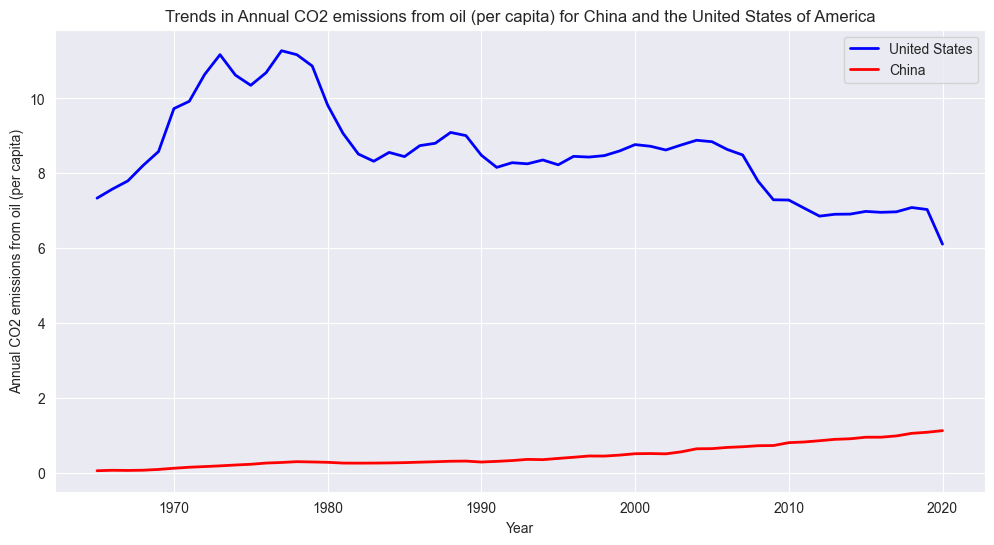

In [317]:
# Plot the trends in annual CO2 emissions from oil (per capita) for China and the United States of America
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y='Annual CO2 emissions from oil (per capita)', label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y='Annual CO2 emissions from oil (per capita)', label='China', color='red', linewidth=2)
plt.title('Trends in Annual CO2 emissions from oil (per capita) for China and the United States of America')
plt.show()

Take the rolling average of the annual CO2 emissions from oil (per capita) for China and the United States of America. This will help to smooth out the data and make it easier to identify trends. The rolling average will be taken over a window of 10 years.

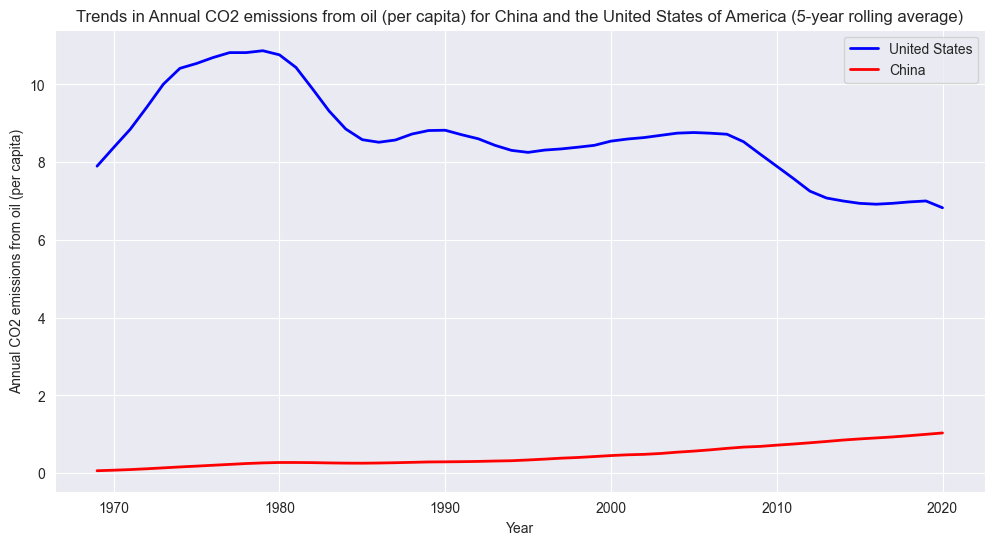

In [318]:
china_rolling_avg = df_china['Annual CO2 emissions from oil (per capita)'].rolling(5).mean()
usa_rolling_avg = df_usa['Annual CO2 emissions from oil (per capita)'].rolling(5).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y=usa_rolling_avg, label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y=china_rolling_avg, label='China', color='red', linewidth=2)
plt.title('Trends in Annual CO2 emissions from oil (per capita) for China and the United States of America (5-year rolling average)')
plt.show()

Based on the plot above it can be observed that the USA produces significantly more CO2 emissions from oil (per capita) compared to China. The emissions from the USA have been decreasing over the years while those from China have been steadily increasing. While the CO2 emissions from oil (per capita) for the USA is decreasing, and that of China is increasing, the USA still produces more CO2 emissions from oil (per capita) compared to China.

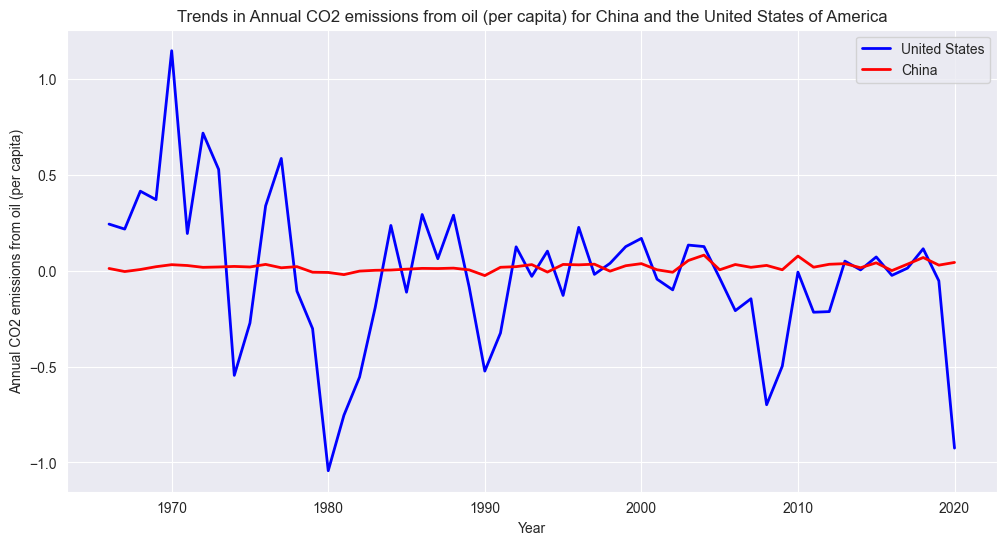

In [319]:
# plot the first order difference of the annual CO2 emissions from oil (per capita) for China and the United States of America
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y=df_usa['Annual CO2 emissions from oil (per capita)'].diff(), label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y=df_china['Annual CO2 emissions from oil (per capita)'].diff(), label='China', color='red', linewidth=2)
plt.title('Trends in Annual CO2 emissions from oil (per capita) for China and the United States of America')
plt.show()

Based on the plot above it can be seen that the USA had its peak in CO2 emissions from oil (per capita) in the 1970s while China had it's peak in the 2000s. It can also be seen that the USA had a drastic decrease in CO2 emissions from oil (per capita) in the 1974, 1980, 1990, 2008 and 2020. Based on the trend the CO2 emissions from oil (per capita) for the USA is expected to continue decreasing while that of China is expected to continue increasing.

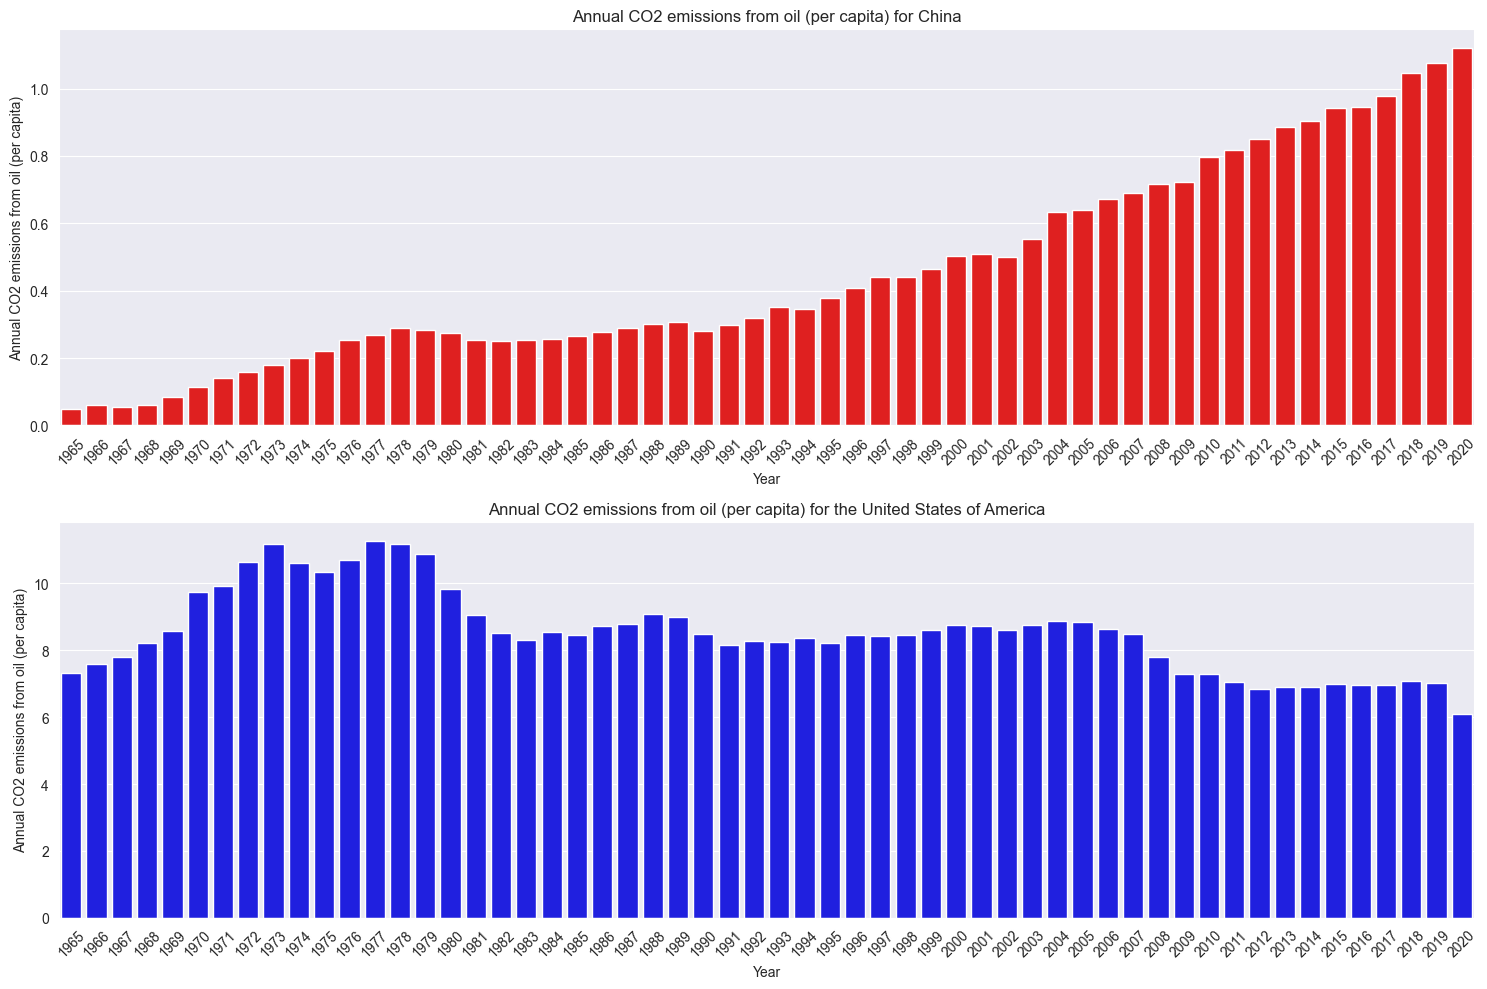

In [320]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=df_china, x='Year', y='Annual CO2 emissions from oil (per capita)', color='red')
plt.title('Annual CO2 emissions from oil (per capita) for China')
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
sns.barplot(data=df_usa, x='Year', y='Annual CO2 emissions from oil (per capita)',color='blue')
plt.title('Annual CO2 emissions from oil (per capita) for the United States of America')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the bar plots above it can be seen that the CO2 emissions from oil (per capita) for China have been increasing over the years while those of the USA have been decreasing. The USA had its highest CO2 emissions from oil (per capita) in 1973 while China had its highest in 2020. The USA had its lowest CO2 emissions from oil (per capita) in 2020 while China had its lowest in 1965.

In [321]:
# output the summary statistics for the 'Annual CO2 emissions from oil (per capita)' for China and the United States of America
print('Summary statistics of the Annual CO2 emissions from oil (per capita) for China')
df_china['Annual CO2 emissions from oil (per capita)'].describe()

Summary statistics of the Annual CO2 emissions from oil (per capita) for China


count    56.000000
mean      0.453016
std       0.298265
min       0.048300
25%       0.253375
50%       0.332100
75%       0.675725
max       1.119800
Name: Annual CO2 emissions from oil (per capita), dtype: float64

In [322]:
print('Summary statistics of the Annual CO2 emissions from oil (per capita) for the United States of America')
df_usa['Annual CO2 emissions from oil (per capita)'].describe()

Summary statistics of the Annual CO2 emissions from oil (per capita) for the United States of America


count    56.000000
mean      8.551493
std       1.242738
min       6.104300
25%       7.735425
50%       8.484650
75%       8.911775
max      11.274000
Name: Annual CO2 emissions from oil (per capita), dtype: float64

The average CO2 emissions from oil (per capita) for China is 0.42 while that of the USA is 8.55. This shows that the USA produces significantly more CO2 emissions from oil (per capita) compared to China.

#### 5. Forecasting using Simple Exponential Smoothing

In [323]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def find_best_alpha(train, test):
    max_alpha = 1
    alpha = 0.01
    best_alpha = 0
    best_rms = 100
    best_y_hat_avg = test.copy()
    y_hat_avg = test.copy()
    while alpha <= max_alpha:
        pred = []
        ft = pd.DataFrame.ewm(train, span = 10).mean()['Annual CO2 emissions from oil (per capita)'].iloc[-1]
        pred.append(ft)
        for i in range(1,len(test['Annual CO2 emissions from oil (per capita)'])):
            dt = test['Annual CO2 emissions from oil (per capita)'].iloc[i]
            ft_plus_1 = alpha*dt + (1-alpha)*ft
            pred.append(ft_plus_1)
            ft = ft_plus_1
        y_hat_avg['SES'] = pd.Series(pred).values
        rms = sqrt(mean_squared_error(test['Annual CO2 emissions from oil (per capita)'], y_hat_avg.SES))
        if rms < best_rms:
            best_rms = rms
            best_alpha = alpha
            best_y_hat_avg = y_hat_avg.copy()
        alpha += 0.01
    return best_alpha, best_y_hat_avg, best_rms
        

#### Forecasting for the United States of America

In [324]:
co2_usa = df_usa[['Year', 'Annual CO2 emissions from oil (per capita)']]

In [325]:
usa_train = co2_usa[co2_usa['Year'] <= 2015]
usa_test = co2_usa[co2_usa['Year'] > 2015]

#### Plot the Train and Test Data

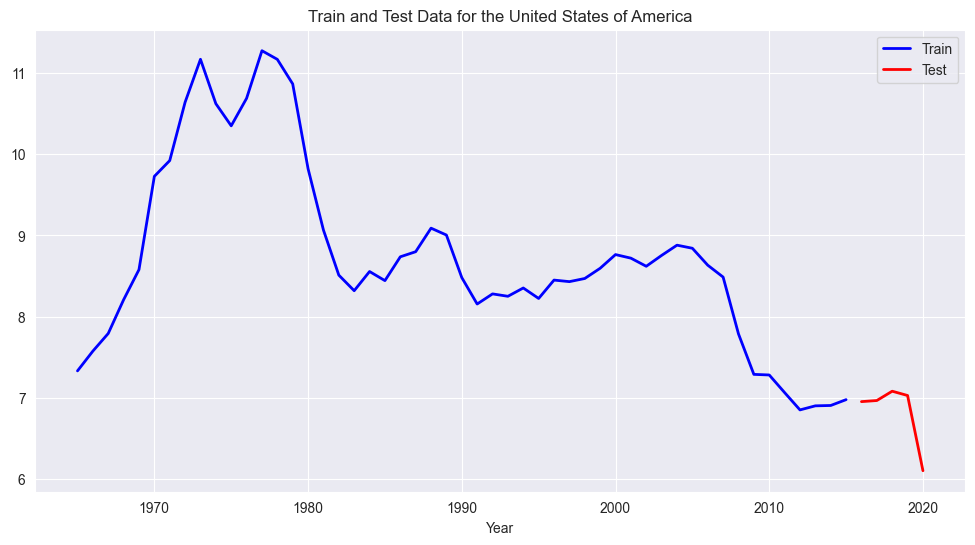

In [326]:
ax = usa_train.plot(x='Year', y='Annual CO2 emissions from oil (per capita)', color='blue', label='Train', figsize=(12, 6), linewidth=2)
usa_test.plot(x='Year', y='Annual CO2 emissions from oil (per capita)', color='red', label='Test', ax=ax, linewidth=2)
plt.title('Train and Test Data for the United States of America')
plt.show()

In [327]:
# Find the best alpha
best_alpha_usa, y_hat_avg_usa, best_rms_usa = find_best_alpha(usa_train, usa_test)
print('Best alpha for the United States of America:', best_alpha_usa)
print('Best RMS for the United States of America:', best_rms_usa)

Best alpha for the United States of America: 0.9900000000000007
Best RMS for the United States of America: 0.18250775307053443


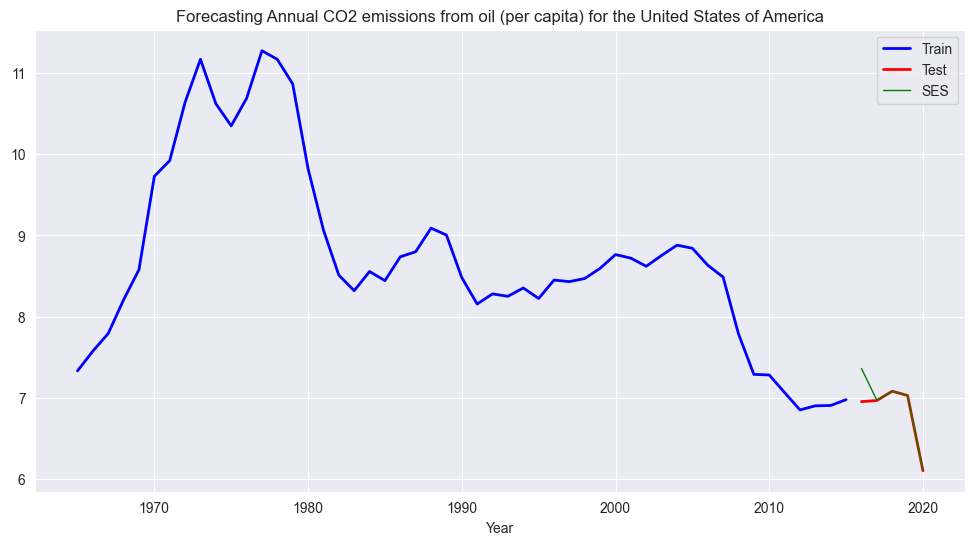

In [336]:
ax = usa_train.plot(x='Year', y='Annual CO2 emissions from oil (per capita)', color='blue', label='Train', figsize=(12, 6), linewidth=2)
usa_test.plot(x='Year', y='Annual CO2 emissions from oil (per capita)', color='red', label='Test', ax=ax, linewidth=2)
y_hat_avg_usa.plot(x='Year', y='SES', color='green', label='SES', ax=ax, linewidth=1)
plt.title('Forecasting Annual CO2 emissions from oil (per capita) for the United States of America')
plt.show()

#### Forecasting for China

In [337]:
co2_china = df_china[['Year', 'Annual CO2 emissions from oil (per capita)']]

In [338]:
china_train = co2_china[co2_china['Year'] <= 2015]
china_test = co2_china[co2_china['Year'] > 2015]

In [339]:
# Find the best alpha
best_alpha_china, y_hat_avg_china, best_rms_china = find_best_alpha(china_train, china_test)
print('Best alpha for China:', best_alpha_china)
print('Best RMS for China:', best_rms_china)

Best alpha for China: 0.9900000000000007
Best RMS for China: 0.06252526358264343


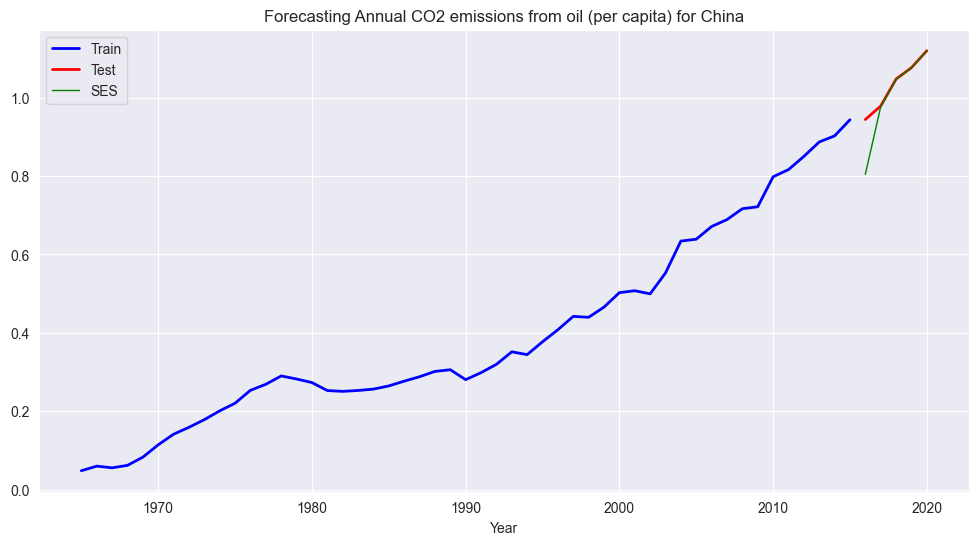

In [340]:
ax = china_train.plot(x='Year', y='Annual CO2 emissions from oil (per capita)', color='blue', label='Train', figsize=(12, 6), linewidth=2)
china_test.plot(x='Year', y='Annual CO2 emissions from oil (per capita)', color='red', label='Test', ax=ax, linewidth=2)
y_hat_avg_china.plot(x='Year', y='SES', color='green', label='SES', ax=ax, linewidth=1)
plt.title('Forecasting Annual CO2 emissions from oil (per capita) for China')
plt.show()

#### 6. Trends in 'Coal Consumption - TWh' and 'Annual CO2 emissions from gas (per capita)'

#### Trends in 'Coal Consumption - TWh'

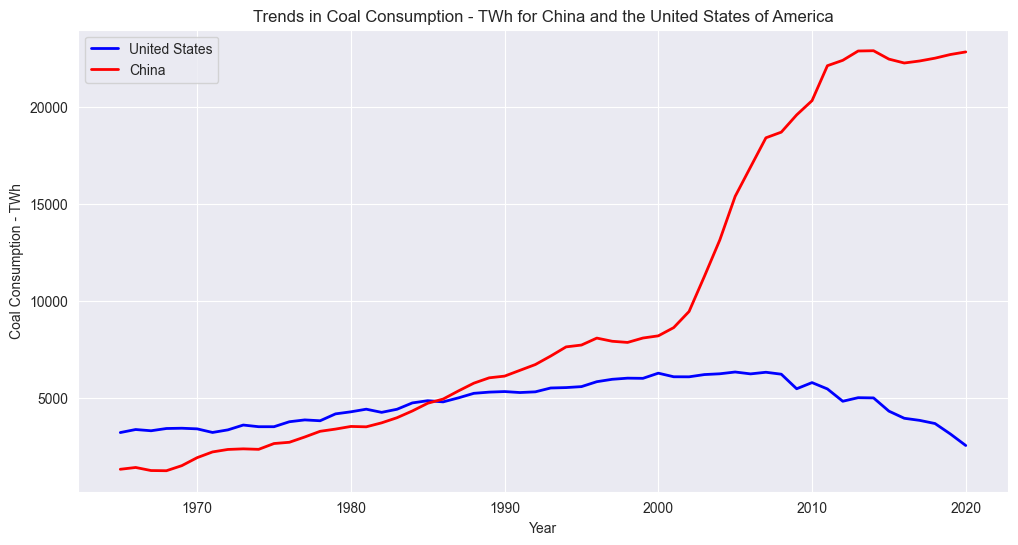

In [341]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y='Coal Consumption - TWh', label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y='Coal Consumption - TWh', label='China', color='red', linewidth=2)
plt.title('Trends in Coal Consumption - TWh for China and the United States of America')
plt.show()

Take the rolling average of the 'Coal Consumption - TWh' for China and the United States of America. This will help to smooth out the data and make it easier to identify trends. The rolling average will be taken over a window of 5 years.

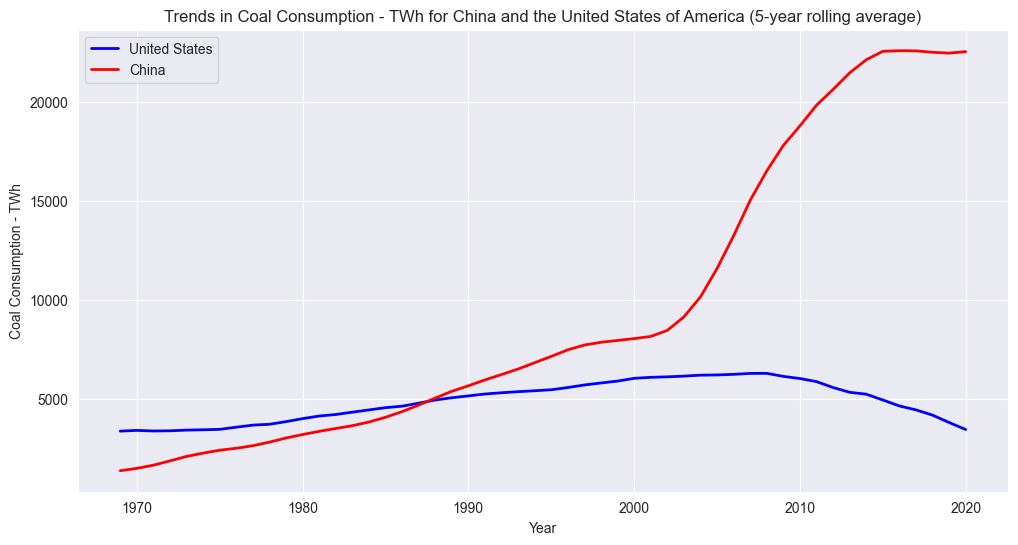

In [342]:
china_rolling_avg_coal = df_china['Coal Consumption - TWh'].rolling(5).mean()
usa_rolling_avg_coal = df_usa['Coal Consumption - TWh'].rolling(5).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y=usa_rolling_avg_coal, label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y=china_rolling_avg_coal, label='China', color='red', linewidth=2)
plt.title('Trends in Coal Consumption - TWh for China and the United States of America (5-year rolling average)')
plt.show()

Based on the plot above it can be observed that between 1968 and 1988 the US consumed more coal compared to China. However, from 1988 China started consuming more coal compared to the US. The US had its peak in coal consumption in 2007 while China had its peak in 2013. The US had its lowest coal consumption in 2020 while China had its lowest in 1965. Based on the trend the coal consumption for the US is expected to continue decreasing while that of China is expected to continue increasing.

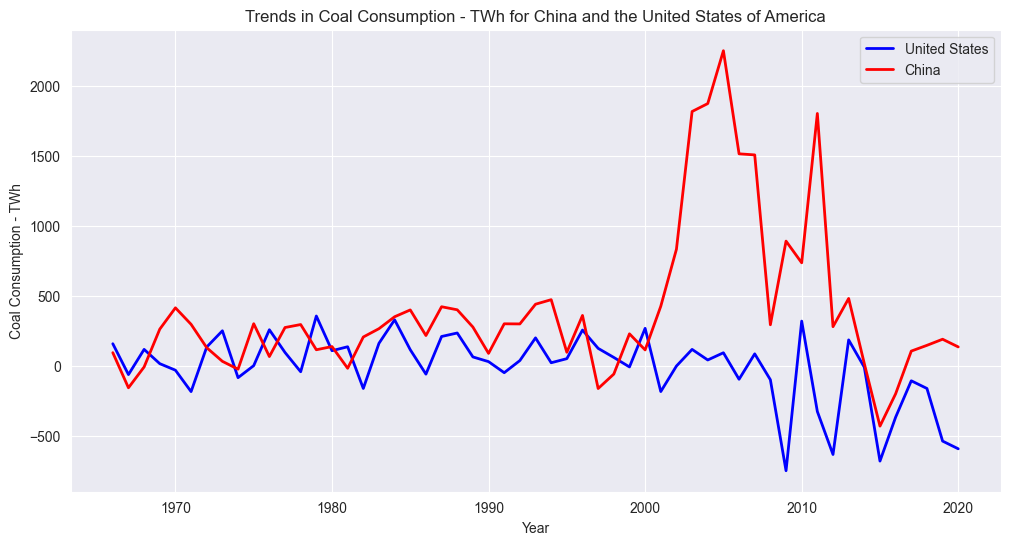

In [352]:
# Plot the first order difference of the 'Coal Consumption - TWh' for China and the United States of America
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y=df_usa['Coal Consumption - TWh'].diff(), label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y=df_china['Coal Consumption - TWh'].diff(), label='China', color='red', linewidth=2)
plt.title('Trends in Coal Consumption - TWh for China and the United States of America')
plt.show()

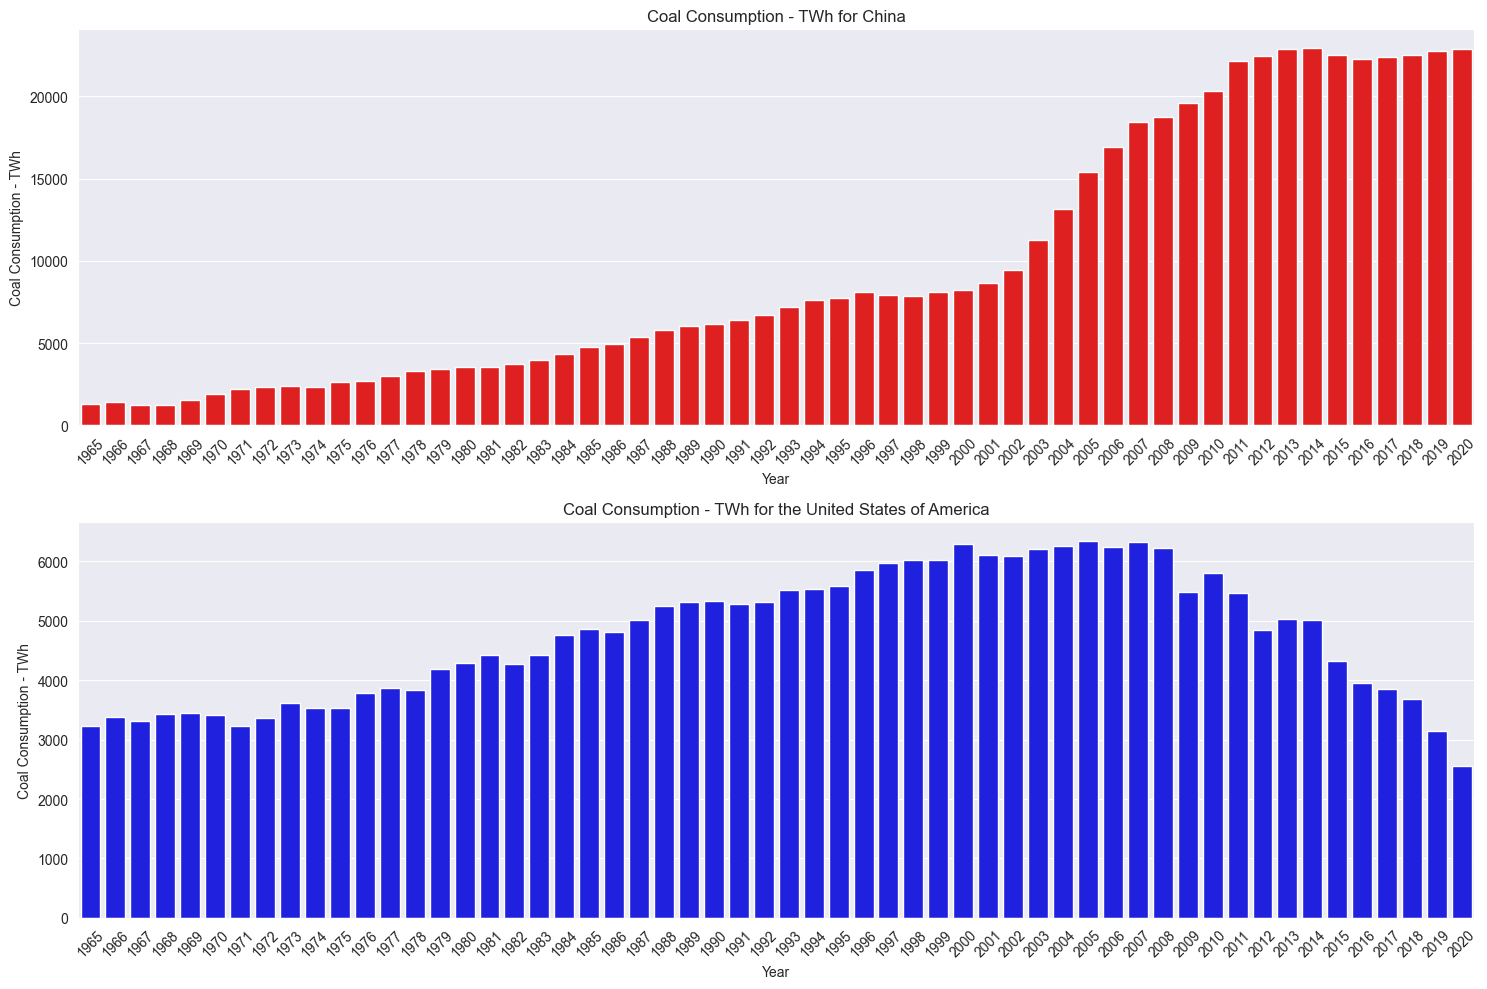

In [343]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=df_china, x='Year', y='Coal Consumption - TWh', color='red')
plt.title('Coal Consumption - TWh for China')
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
sns.barplot(data=df_usa, x='Year', y='Coal Consumption - TWh',color='blue')
plt.title('Coal Consumption - TWh for the United States of America')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the bar plots it can be seen that 2013 was the year with the highest coal consumption for China while 2007 was the year with the highest coal consumption for the US. 1965 was the year with the lowest coal consumption for China while 2020 was the year with the lowest coal consumption for the US. 2020 was one of the years with the highest col consumption for Chine while 2020 was the year with the lowest coal consumption for the US.

#### Trends in 'Annual CO2 emissions from Coal (per capita)'

Annual CO2 emissions from coal (per capita) will be used to compare the trends in CO2 emissions from coal for China and the United States of America. This feature was chosen because it is the most relevant feature for the comparison since both countries burn a lot of fossil fuels for energy production. [Source](https://www.investopedia.com/articles/investing/092915/5-countries-produce-most-carbon-dioxide-co2.asp)
 

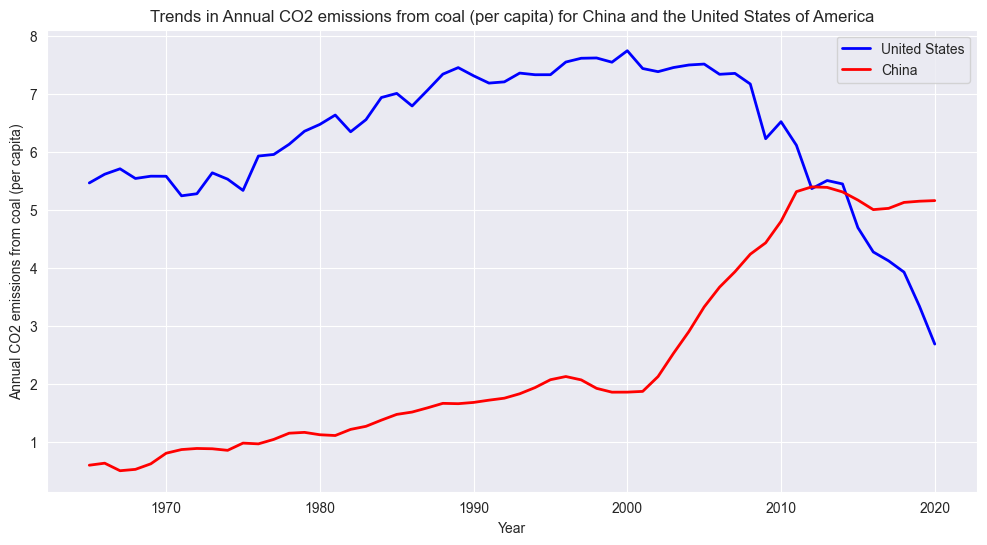

In [348]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y='Annual CO2 emissions from coal (per capita)', label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y='Annual CO2 emissions from coal (per capita)', label='China', color='red', linewidth=2)
plt.title('Trends in Annual CO2 emissions from coal (per capita) for China and the United States of America')
plt.show()

Take the rolling average of the annual CO2 emissions from coal (per capita) for China and the United States of America. This will help to smooth out the data and make it easier to identify trends. The rolling average will be taken over a window of 5 years.

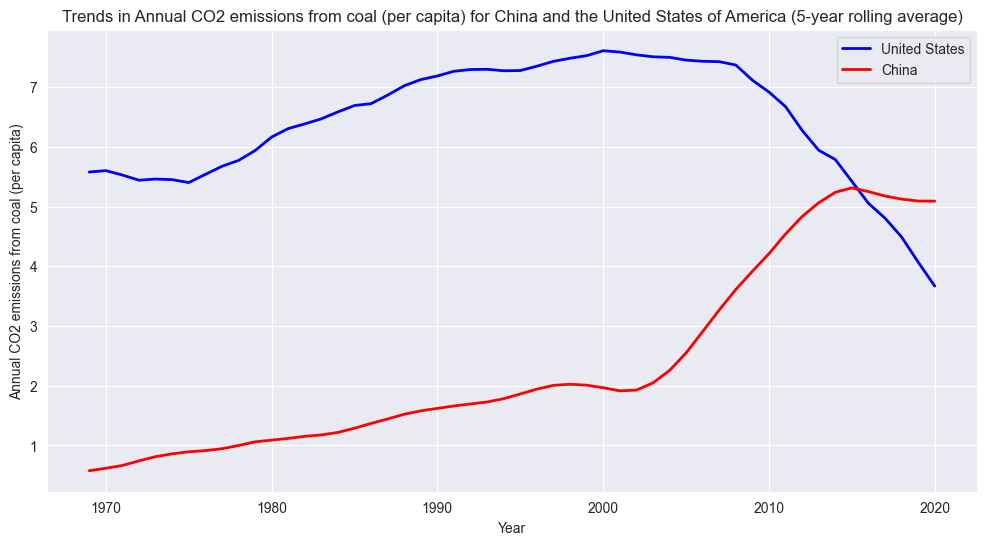

In [350]:
china_rolling_avg_co2 = df_china['Annual CO2 emissions from coal (per capita)'].rolling(5).mean()
usa_rolling_avg_co2 = df_usa['Annual CO2 emissions from coal (per capita)'].rolling(5).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y=usa_rolling_avg_co2, label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y=china_rolling_avg_co2, label='China', color='red', linewidth=2)
plt.title('Trends in Annual CO2 emissions from coal (per capita) for China and the United States of America (5-year rolling average)')
plt.show()

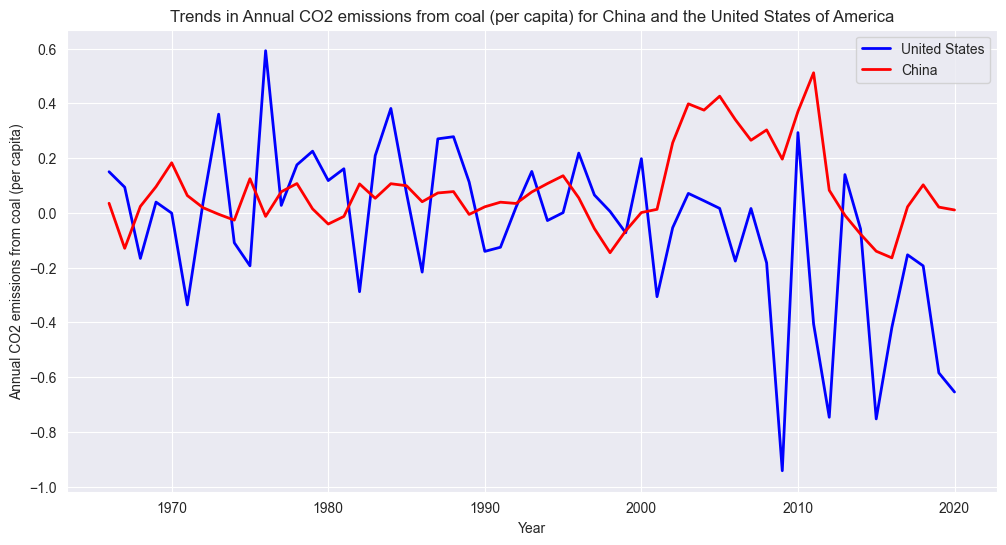

In [353]:
# Plot the first order difference of the annual CO2 emissions from coal (per capita) for China and the United States of America
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_usa, x='Year', y=df_usa['Annual CO2 emissions from coal (per capita)'].diff(), label='United States', color='blue', linewidth=2)
sns.lineplot(data=df_china, x='Year', y=df_china['Annual CO2 emissions from coal (per capita)'].diff(), label='China', color='red', linewidth=2)
plt.title('Trends in Annual CO2 emissions from coal (per capita) for China and the United States of America')
plt.show()

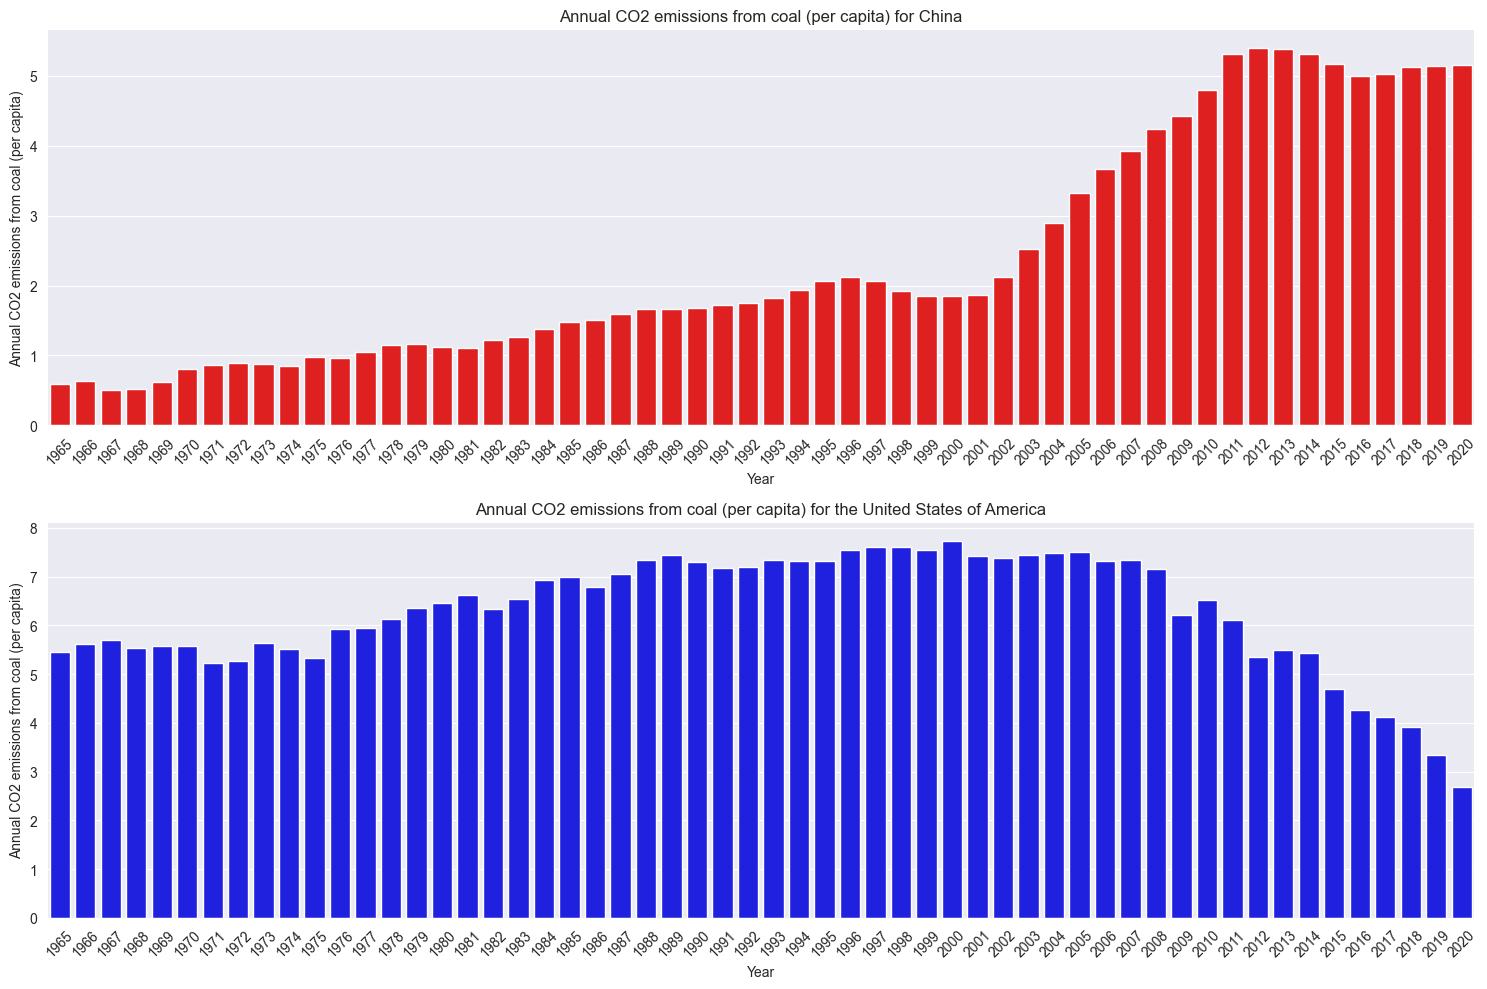

In [351]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=df_china, x='Year', y='Annual CO2 emissions from coal (per capita)', color='red')
plt.title('Annual CO2 emissions from coal (per capita) for China')
plt.xticks(rotation=45)
plt.subplot(2, 1, 2)
sns.barplot(data=df_usa, x='Year', y='Annual CO2 emissions from coal (per capita)',color='blue')
plt.title('Annual CO2 emissions from coal (per capita) for the United States of America')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()